In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pathlib import Path
import hvplot.pandas

pop_2017 = Path("Resources/tx_pop_zip_2017.csv")
pop_2018 = Path("Resources/tx_pop_zip_2018.csv")
pop_2019 = Path("Resources/tx_pop_zip_2019.csv")
pop_2020 = Path("Resources/tx_pop_zip_2020.csv")
pop_2021 = Path("Resources/tx_pop_zip_2021.csv")
pop_2022 = Path("Resources/tx_pop_zip_2022.csv")
zip_cities = Path("Resources/uszips.csv")

columns_delete = ['GEO_ID', 'B01003_001M', 'Unnamed: 4']
data_2017 = pd.DataFrame(pd.read_csv(pop_2017)).drop(columns = columns_delete)
data_2018 = pd.DataFrame(pd.read_csv(pop_2018)).drop(columns = columns_delete)
data_2019 = pd.DataFrame(pd.read_csv(pop_2019)).drop(columns = columns_delete)
data_2020 = pd.DataFrame(pd.read_csv(pop_2020)).drop(columns = columns_delete)
data_2021 = pd.DataFrame(pd.read_csv(pop_2021)).drop(columns = columns_delete)
data_2022 = pd.DataFrame(pd.read_csv(pop_2022)).drop(columns = columns_delete)
city_zip = pd.DataFrame(pd.read_csv(zip_cities, delimiter = ","))

first_merge = pd.merge(data_2017, data_2018, on = 'NAME', how = 'outer')
first_merge = first_merge.rename(columns = {"B01003_001E_x": "A", "B01003_001E_y": "B"})
second_merge = pd.merge(first_merge, data_2019, on = 'NAME', how = 'outer')
second_merge = second_merge.rename(columns = {"B01003_001E": "C"})
third_merge = pd.merge(second_merge, data_2020, on = 'NAME', how = 'outer')
third_merge = third_merge.rename(columns = {"B01003_001E": "D"})
fourth_merge = pd.merge(third_merge, data_2021, on = 'NAME', how = 'outer')
fourth_merge = fourth_merge.rename(columns = {"B01003_001E": "E"})
population_growth_df = pd.merge(fourth_merge, data_2022, on = 'NAME', how = 'outer')
population_growth_df = population_growth_df.rename(columns = {"B01003_001E": "F"})
pd.reset_option('display.max_rows', None)

population_growth_df.loc[0, 'NAME'] = "Zip Code"
population_growth_df.loc[0, 'A'] = "2017"
population_growth_df.loc[0, 'B'] = "2018"
population_growth_df.loc[0, 'C'] = "2019"
population_growth_df.loc[0, 'D'] = "2020"
population_growth_df.loc[0, 'E'] = "2021"
population_growth_df.loc[0, 'F'] = "2022"

population_growth_df.columns = population_growth_df.iloc[0]
population_growth_df = population_growth_df[1:]
population_growth_df["Zip Code"] = population_growth_df["Zip Code"].str.replace("ZCTA5 ", '')
population_growth_df = population_growth_df.set_index('Zip Code')
population_growth_df = population_growth_df.sort_index()
population_growth_df = population_growth_df.dropna(how="any")

texas_min_zip = 75000
texas_max_zip = 79999

population_growth_df.index = population_growth_df.index.astype(int)
mask = (population_growth_df.index >= texas_min_zip) & (population_growth_df.index <= texas_max_zip)
population_growth_df = population_growth_df[mask]

population_growth_df

,2017,2018,2019,2020,2021,2022
Zip Code,,,,,,
75001,14617,15000,14992,15418,16287,16633
75002,69688,70597,71253,73916,71102,72679
75006,50788,51136,51642,52231,48104,48062
75007,53744,54701,55500,57513,54448,54498
75009,10557,11941,14089,15348,24737,28109
...,...,...,...,...,...,...
79932,28345,28682,28243,28893,28594,29269
79934,25846,26289,26445,26360,26916,26620
79935,18166,17434,17850,18546,19073,18815


In [3]:
city_zip["zip"] = city_zip["zip"].astype(str)
city_zip

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,17126.0,102.6,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37895.0,482.5,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49136.0,552.4,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5751.0,50.1,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26153.0,272.1,72011,Añasco,"{""72011"": 96.7, ""72099"": 2.81, ""72083"": 0.37, ...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33783,99923,55.98043,-130.03803,Hyder,AK,Alaska,True,NaN,13.0,0.3,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,2198,False,False,America/Sitka
33784,99925,55.55398,-132.96276,Klawock,AK,Alaska,True,NaN,917.0,6.6,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,2198,False,False,America/Sitka
33785,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1445.0,4.2,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,2198,False,False,America/Metlakatla
33786,99927,56.33305,-133.60044,Point Baker,AK,Alaska,True,NaN,11.0,0.9,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,2198,False,False,America/Sitka


In [4]:
texas_mask = city_zip["state_id"] == "TX"
tx_city_zip = city_zip[texas_mask]
tx_city_zip = tx_city_zip.set_index("zip")
tx_city_zip = tx_city_zip.drop("73960")
need_columns = ["lat", "lng", "city", "county_name"]
tx_city_zip = tx_city_zip.loc[:, need_columns]
tx_city_zip = tx_city_zip.rename(columns={"lat": "Latitude", "lng": "Longitude", "city": "City", "county_name": "County"})
tx_city_zip

,Latitude,Longitude,City,County
zip,,,,
75001,32.96015,-96.83808,Addison,Dallas
75002,33.08946,-96.60639,Allen,Collin
75006,32.96165,-96.89717,Carrollton,Dallas
75007,33.00498,-96.89590,Carrollton,Denton
75009,33.33840,-96.75185,Celina,Collin
...,...,...,...,...
79932,31.87753,-106.60680,El Paso,El Paso
79934,31.95206,-106.43400,El Paso,El Paso
79935,31.76804,-106.33029,El Paso,El Paso


In [5]:
population_growth_df.index = population_growth_df.index.astype(str)
population_growth_df.index = population_growth_df.index.str.strip()

texas_population_growth = pd.merge(population_growth_df, tx_city_zip, left_index=True, right_index=True)
texas_population_growth = texas_population_growth[["City", "County", "Latitude", "Longitude", "2017", "2018", "2019", "2020", "2021", "2022"]]
texas_population_growth.index.name = "Zip"
texas_population_growth

,City,County,Latitude,Longitude,2017,2018,2019,2020,2021,2022
Zip,,,,,,,,,,
75001,Addison,Dallas,32.96015,-96.83808,14617,15000,14992,15418,16287,16633
75002,Allen,Collin,33.08946,-96.60639,69688,70597,71253,73916,71102,72679
75006,Carrollton,Dallas,32.96165,-96.89717,50788,51136,51642,52231,48104,48062
75007,Carrollton,Denton,33.00498,-96.89590,53744,54701,55500,57513,54448,54498
75009,Celina,Collin,33.33840,-96.75185,10557,11941,14089,15348,24737,28109
...,...,...,...,...,...,...,...,...,...,...
79932,El Paso,El Paso,31.87753,-106.60680,28345,28682,28243,28893,28594,29269
79934,El Paso,El Paso,31.95206,-106.43400,25846,26289,26445,26360,26916,26620
79935,El Paso,El Paso,31.76804,-106.33029,18166,17434,17850,18546,19073,18815


In [6]:
# texas_population_growth = texas_population_growth.set_index(["County", "Latitude", "Longitude", "City"], append=True)
# texas_population_growth

In [7]:
texas_population_growth.columns.get_loc("2018")

5

In [8]:
year_columns = texas_population_growth.columns[4:]
year_columns

Index(['2017', '2018', '2019', '2020', '2021', '2022'], dtype='object')

In [9]:
texas_population_growth[year_columns] = texas_population_growth[year_columns].apply(pd.to_numeric, errors= 'coerce')
percent_growth = pd.DataFrame(index = texas_population_growth.index)
percent_growth["City"] = texas_population_growth["City"]
percent_growth["County"] = texas_population_growth["County"]
percent_growth["Latitude"] = texas_population_growth["Latitude"]
percent_growth["Longitude"] = texas_population_growth["Longitude"]
original_year = 4
for year in range(original_year, len(texas_population_growth.columns) - 1):
    current_year = year + 1
    current_column = texas_population_growth.columns[current_year]
    percent_change = ((texas_population_growth[current_column] - texas_population_growth.iloc[:, year]) / texas_population_growth.iloc[:, year]) * 100
    percent_growth[current_column] = percent_change.map("{:.2f}%".format)

pd.reset_option('display.max_rows', None)
#percent_growth.dropna()
percent_growth.replace("nan%", "0.00%", inplace = True)
percent_growth

,City,County,Latitude,Longitude,2018,2019,2020,2021,2022
Zip,,,,,,,,,
75001,Addison,Dallas,32.96015,-96.83808,2.62%,-0.05%,2.84%,5.64%,2.12%
75002,Allen,Collin,33.08946,-96.60639,1.30%,0.93%,3.74%,-3.81%,2.22%
75006,Carrollton,Dallas,32.96165,-96.89717,0.69%,0.99%,1.14%,-7.90%,-0.09%
75007,Carrollton,Denton,33.00498,-96.89590,1.78%,1.46%,3.63%,-5.33%,0.09%
75009,Celina,Collin,33.33840,-96.75185,13.11%,17.99%,8.94%,61.17%,13.63%
...,...,...,...,...,...,...,...,...,...
79932,El Paso,El Paso,31.87753,-106.60680,1.19%,-1.53%,2.30%,-1.03%,2.36%
79934,El Paso,El Paso,31.95206,-106.43400,1.71%,0.59%,-0.32%,2.11%,-1.10%
79935,El Paso,El Paso,31.76804,-106.33029,-4.03%,2.39%,3.90%,2.84%,-1.35%


In [10]:
cleaned_percent = percent_growth[percent_growth.apply(lambda row: not row.isin(["inf%", "-inf%"]).any(), axis=1)]

pd.reset_option('display.max_rows', None)
cleaned_percent

,City,County,Latitude,Longitude,2018,2019,2020,2021,2022
Zip,,,,,,,,,
75001,Addison,Dallas,32.96015,-96.83808,2.62%,-0.05%,2.84%,5.64%,2.12%
75002,Allen,Collin,33.08946,-96.60639,1.30%,0.93%,3.74%,-3.81%,2.22%
75006,Carrollton,Dallas,32.96165,-96.89717,0.69%,0.99%,1.14%,-7.90%,-0.09%
75007,Carrollton,Denton,33.00498,-96.89590,1.78%,1.46%,3.63%,-5.33%,0.09%
75009,Celina,Collin,33.33840,-96.75185,13.11%,17.99%,8.94%,61.17%,13.63%
...,...,...,...,...,...,...,...,...,...
79932,El Paso,El Paso,31.87753,-106.60680,1.19%,-1.53%,2.30%,-1.03%,2.36%
79934,El Paso,El Paso,31.95206,-106.43400,1.71%,0.59%,-0.32%,2.11%,-1.10%
79935,El Paso,El Paso,31.76804,-106.33029,-4.03%,2.39%,3.90%,2.84%,-1.35%


In [11]:
cleaned_percent.shape

(1911, 9)

In [12]:
top_percentages = cleaned_percent.sort_values("2022", ascending = False)
top_twentyfive = top_percentages.head(25)
top_twentyfive

,City,County,Latitude,Longitude,2018,2019,2020,2021,2022
Zip,,,,,,,,,
76519,Burlington,Milam,30.98978,-97.03579,-12.25%,21.45%,-28.13%,-28.57%,93.20%
79766,Odessa,Ector,31.71014,-102.36185,4.54%,12.90%,-0.23%,40.11%,9.92%
75414,Bells,Grayson,33.62504,-96.43193,-9.58%,18.65%,-0.64%,-11.93%,9.87%
77304,Conroe,Montgomery,30.33097,-95.51538,7.29%,8.38%,7.58%,2.25%,9.86%
76853,Lometa,Lampasas,31.24774,-98.39047,-1.97%,-5.70%,-8.45%,11.93%,9.85%
77564,Hull,Liberty,30.21811,-94.65989,-15.51%,12.51%,-18.86%,13.38%,9.79%
76377,Petrolia,Clay,34.01010,-98.24191,-3.29%,-30.01%,-25.23%,-3.86%,9.77%
75438,Dodd City,Fannin,33.60701,-96.07462,-1.09%,9.25%,-1.92%,-2.06%,9.76%
79119,Amarillo,Randall,35.10876,-102.01968,3.21%,6.89%,5.63%,10.14%,9.73%


In [13]:
column_year = ["2018", "2019", "2020", "2021", "2022"]
top_twentyfive.loc[:, column_year] = top_twentyfive[column_year].replace('%', '', regex=True).apply(pd.to_numeric, errors='coerce')
top_twentyfive

,City,County,Latitude,Longitude,2018,2019,2020,2021,2022
Zip,,,,,,,,,
76519,Burlington,Milam,30.98978,-97.03579,-12.25,21.45,-28.13,-28.57,93.2
79766,Odessa,Ector,31.71014,-102.36185,4.54,12.9,-0.23,40.11,9.92
75414,Bells,Grayson,33.62504,-96.43193,-9.58,18.65,-0.64,-11.93,9.87
77304,Conroe,Montgomery,30.33097,-95.51538,7.29,8.38,7.58,2.25,9.86
76853,Lometa,Lampasas,31.24774,-98.39047,-1.97,-5.7,-8.45,11.93,9.85
77564,Hull,Liberty,30.21811,-94.65989,-15.51,12.51,-18.86,13.38,9.79
76377,Petrolia,Clay,34.01010,-98.24191,-3.29,-30.01,-25.23,-3.86,9.77
75438,Dodd City,Fannin,33.60701,-96.07462,-1.09,9.25,-1.92,-2.06,9.76
79119,Amarillo,Randall,35.10876,-102.01968,3.21,6.89,5.63,10.14,9.73


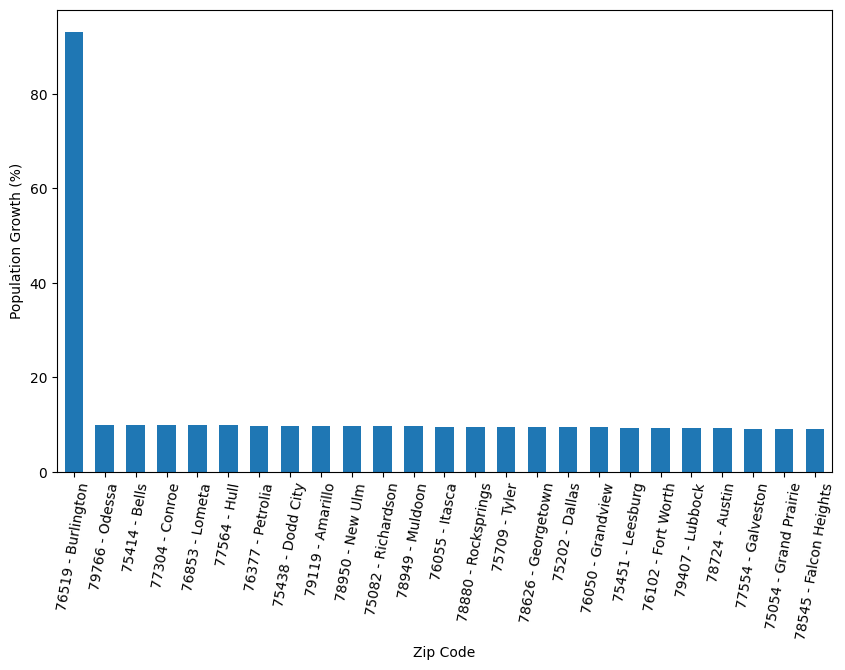

In [14]:
x_axis = top_twentyfive.index + ' - ' + top_twentyfive["City"]
y_axis = top_twentyfive["2022"]
first_bar = pd.DataFrame({'Zip': x_axis, "Population Growth": y_axis})
first_bar = first_bar.plot(kind = 'bar', x='Zip', y='Population Growth', legend=False, width = 0.6, figsize=(10, 6))
first_bar.set_xticklabels(first_bar.get_xticklabels(), rotation = 80)
plt.xlabel('Zip Code')
plt.ylabel('Population Growth (%)')
plt.show()

In [15]:
bottom_percentages = cleaned_percent.sort_values("2022", ascending = False)
bottom_twentyfive = bottom_percentages.tail(25)
bottom_twentyfive

,City,County,Latitude,Longitude,2018,2019,2020,2021,2022
Zip,,,,,,,,,
76092,Southlake,Tarrant,32.95562,-97.14879,2.55%,1.67%,1.31%,-1.76%,-0.20%
76116,Fort Worth,Tarrant,32.72128,-97.44766,1.71%,-0.26%,-0.27%,-2.09%,-0.18%
76528,Gatesville,Coryell,31.43589,-97.78440,0.70%,2.73%,11.22%,0.68%,-0.17%
78644,Lockhart,Caldwell,29.87111,-97.67292,-0.07%,0.63%,-3.89%,13.83%,-0.15%
77611,Bridge City,Orange,30.01259,-93.82220,3.70%,-0.64%,0.35%,14.18%,-0.15%
75227,Dallas,Dallas,32.77044,-96.68831,2.06%,1.57%,1.18%,-3.69%,-0.14%
79761,Odessa,Ector,31.85603,-102.34850,0.11%,-1.05%,1.05%,-7.04%,-0.14%
77064,Houston,Harris,29.92279,-95.54670,0.43%,-2.32%,0.83%,0.54%,-0.13%
76801,Brownwood,Brown,31.75471,-99.05462,1.61%,-1.22%,-1.50%,1.81%,-0.13%


In [16]:
column_year = ["2018", "2019", "2020", "2021", "2022"]
bottom_twentyfive.loc[:, column_year] = bottom_twentyfive[column_year].replace('%', '', regex=True).apply(pd.to_numeric, errors='coerce')
bottom_twentyfive

,City,County,Latitude,Longitude,2018,2019,2020,2021,2022
Zip,,,,,,,,,
76092,Southlake,Tarrant,32.95562,-97.14879,2.55,1.67,1.31,-1.76,-0.2
76116,Fort Worth,Tarrant,32.72128,-97.44766,1.71,-0.26,-0.27,-2.09,-0.18
76528,Gatesville,Coryell,31.43589,-97.78440,0.7,2.73,11.22,0.68,-0.17
78644,Lockhart,Caldwell,29.87111,-97.67292,-0.07,0.63,-3.89,13.83,-0.15
77611,Bridge City,Orange,30.01259,-93.82220,3.7,-0.64,0.35,14.18,-0.15
75227,Dallas,Dallas,32.77044,-96.68831,2.06,1.57,1.18,-3.69,-0.14
79761,Odessa,Ector,31.85603,-102.34850,0.11,-1.05,1.05,-7.04,-0.14
77064,Houston,Harris,29.92279,-95.54670,0.43,-2.32,0.83,0.54,-0.13
76801,Brownwood,Brown,31.75471,-99.05462,1.61,-1.22,-1.5,1.81,-0.13


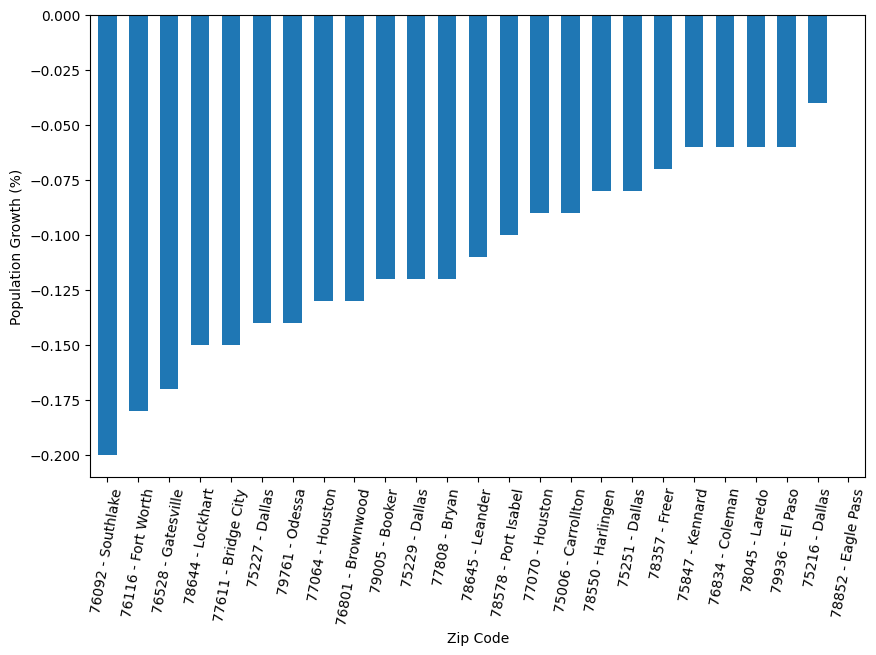

In [17]:
x_axis = bottom_twentyfive.index + ' - ' + bottom_twentyfive["City"]
y_axis = bottom_twentyfive["2022"]
second_bar = pd.DataFrame({'Zip': x_axis, "Population Growth": y_axis})
second_bar = second_bar.plot(kind = 'bar', x='Zip', y='Population Growth', legend=False, width = 0.6, figsize=(10, 6))
second_bar.set_xticklabels(second_bar.get_xticklabels(), rotation = 80)
plt.xlabel('Zip Code')
plt.ylabel('Population Growth (%)')
plt.show()

In [18]:
cleaned_percent.hvplot.points(x='Longitude', y='Latitude', geo = True, tiles = "OSM",
               alpha = 0.5, color = "City", width=1024, height=768,
               hover_cols=['City','2018','2019','2020','2021','2022'])

ImportError: Geographic projection support requires: cartopy, geoviews, pyproj.

In [ ]:
top_geo_graph = top_twentyfive.hvplot.points(x='Longitude', y='Latitude',
               width=1024, height=768, geo = True, tiles = "OSM",
               alpha = 1, color = "green",
               hover_cols=['City','2018','2019','2020','2021','2022'])
top_geo_graph

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (City,2018,2019,2020,2021,2022)

In [ ]:
bottom_geo_graph = bottom_twentyfive.hvplot.points(x='Longitude', y='Latitude',
               width=1024, height=768, geo = True, tiles = "OSM",
               alpha = 1, color = "red",
               hover_cols=['City','2018','2019','2020','2021','2022'])
bottom_geo_graph

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (City,2018,2019,2020,2021,2022)

In [28]:
unique_cities = texas_population_growth.drop_duplicates(subset="City", keep="first")
city_no_zip = texas_population_growth.groupby("City", as_index=False)[['2017', '2018', '2019', '2020', '2021', '2022']].sum()
city_no_zip = pd.merge(city_no_zip, unique_cities[["City", "County"]], on="City")
city_no_zip = city_no_zip.sort_values("2022", ascending = False)
city_no_zip

,City,2017,2018,2019,2020,2021,2022,County
566,Houston,3155878,3187352,3195984,3216453,3201957,3201870,Harris
1093,San Antonio,1746096,1778071,1800724,1827415,1818122,1837080,Bexar
301,Dallas,1371575,1392406,1407371,1417944,1375223,1374681,Dallas
52,Austin,1070203,1087962,1107504,1116176,1131178,1147323,Travis
436,Fort Worth,894436,911952,929959,943098,959265,972840,Tarrant
...,...,...,...,...,...,...,...,...
1059,Romayor,181,166,223,102,0,0,Liberty
1023,Redford,93,105,121,23,43,0,Presidio
758,Maple,95,92,161,238,0,0,Bailey
97,Bend,15,11,9,13,0,0,San Saba
